In [66]:
# [t4]
import numpy as np
import matplotlib.pyplot as plt

def __draw_ys(ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(ys)
    plt.xlabel('x')
    fig.show()

def __draw(xs, ys):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(xs, ys)
    plt.xlabel('x')
    fig.show()

def expand(arr, n):
    return np.pad(arr, (0, n - len(arr)), 'constant')

def pzmap(bz, az):
    m = len(bz)
    n = len(az)
    level = max(m, n)
    pad_bz = expand(bz, level)
    pad_az = expand(az, level)
    return [np.roots(pad_bz), np.roots(pad_az)]

def plot_complex_numbers(bz, az):
    # Create a new figure with custom size
    fig = plt.figure(figsize=(6, 6))
    
    # Extract real and imaginary parts for both lists
    real_parts1 = [z.real for z in bz]
    imaginary_parts1 = [z.imag for z in bz]
    real_parts2 = [z.real for z in az]
    imaginary_parts2 = [z.imag for z in az]
    
    # Create scatter plots for both lists
    plt.scatter(real_parts1, imaginary_parts1, marker='o', color='blue', label='Zeros')
    plt.scatter(real_parts2, imaginary_parts2, marker='x', color='red', label='Poles')
    
    # Draw the unit circle
    theta = np.linspace(0, 2 * np.pi, 100)
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)
    plt.plot(x_circle, y_circle, color='green', label='Unit Circle')
    
    # Set axis limits
    # plt.xlim(k1, 3)
    # plt.ylim(-3, 3)
    
    # Force the x and y axis to be the same scale (each 1x1 grid should look like a square)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Add labels and title
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Complex Numbers in the Complex Plane')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage
# bz = [2, 3]
# az = [1, -0.5]

def cap_h_value(bz, az, z: complex):
    num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
    den = sum([az[i] * z ** (-i) for i in range(len(az))])
    return num / den
def freqz(bz, az, w):
    ... # w between -pi and pi?
    hs = np.array([cap_h_value(bz, az, np.exp(1j * omega)) for omega in w])
    return w, hs

SAMPLE_N = 5000

def get_mod_pha_real_imag(c):
    return [np.abs(c), np.angle(c), c.real, c.imag]

def filter(bz, az, x, L):
    ...
    # y[n] = 
    xs = expand(x, L) # first several x
    ys = np.zeros_like(xs)
    def y_at(n):
        return 0 if n < 0 else ys[n]
    def x_at(n):
        return 0 if n < 0 else xs[n]
    for n in range(L):
        # calculate y[n]
        ys[n] = sum([bz[i] * x_at(n - i) for i in range(len(bz))]) - sum([az[i] * y_at(n - i) for i in range(1, len(az))])
    return xs, ys

def frequency_response(bz, az, sample_n=SAMPLE_N):
    ws = np.linspace(-np.pi, np.pi, sample_n)
    cap_hs = np.array([cap_h_value(bz, az, np.exp(1j * omega)) for omega in ws])
    return ws, cap_hs

# def analog_frequency_response(hw_func, ws):
#     return ws, np.array([hw_func(w) for w in ws])

def db(x):
    return 20 * np.log10(np.abs(x))


0.9838276553106212


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/2392929418.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


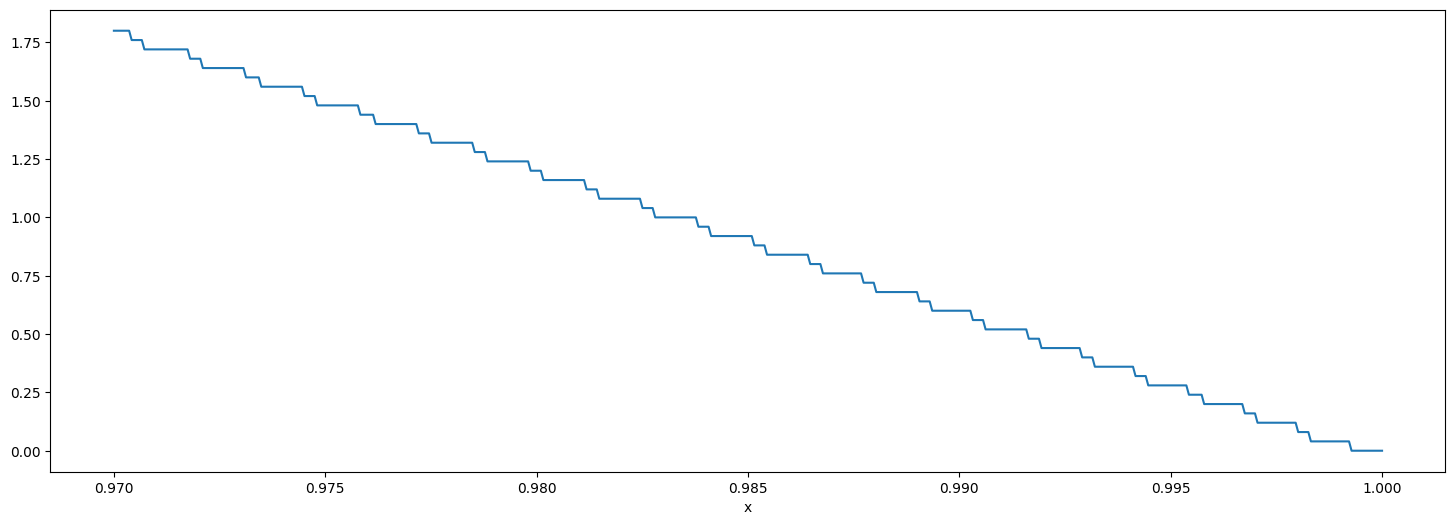

In [45]:
f_s = 200
a_1 = 8
a_2 = 4
f_1 = 7
f_2 = 24
T = 1 / f_s
ns = np.arange(-200, 400)
xs = a_1 * np.cos(2 * np.pi * f_1 * T * ns) + a_2 * np.cos(2 * np.pi * f_2 * T * ns)

notch_f = 24
def ana_f_to_dig_w(f):
    return f / f_s * 2 * np.pi

def dig_w_to_ana_f(w):
    return w / (2 * np.pi) * f_s

notch_dig_w = ana_f_to_dig_w(notch_f)

rs = np.linspace(0.97, 1, 500)
band_fs = []
for r in rs:
    # get the band width of -3dB
    ...
    bz = [1, -2 * np.cos(notch_dig_w), 1]
    az = [1, -2 * r * np.cos(notch_dig_w), r ** 2]
    ws, hs = frequency_response(bz, az)
    hs = np.abs(hs)
    ws, hs = ws[len(ws) // 2:], hs[len(hs) // 2:]
    # first one lower than -3dB
    those_w_higher_than_minus_3_db = [w for w, h in zip(ws, hs) if db(h) < -3]
    if len(those_w_higher_than_minus_3_db) < 2:
        band_fs.append(0)
        continue
    l_f = dig_w_to_ana_f(those_w_higher_than_minus_3_db[0])
    r_f = dig_w_to_ana_f(those_w_higher_than_minus_3_db[-1])
    # print(l_f, r_f)
    band_f = r_f - l_f
    band_fs.append(band_f)

__draw(rs, band_fs)
min_r_making_band_with_1 = [r for r, band_f in zip(rs, band_fs) if band_f <= 1][0]
print(min_r_making_band_with_1)

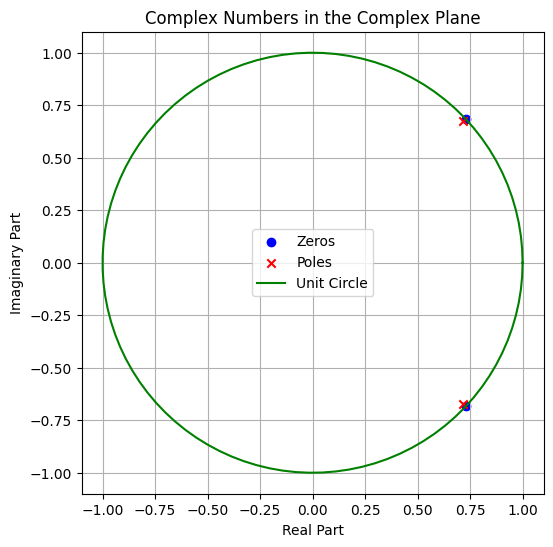

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/3567192490.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/3567192490.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


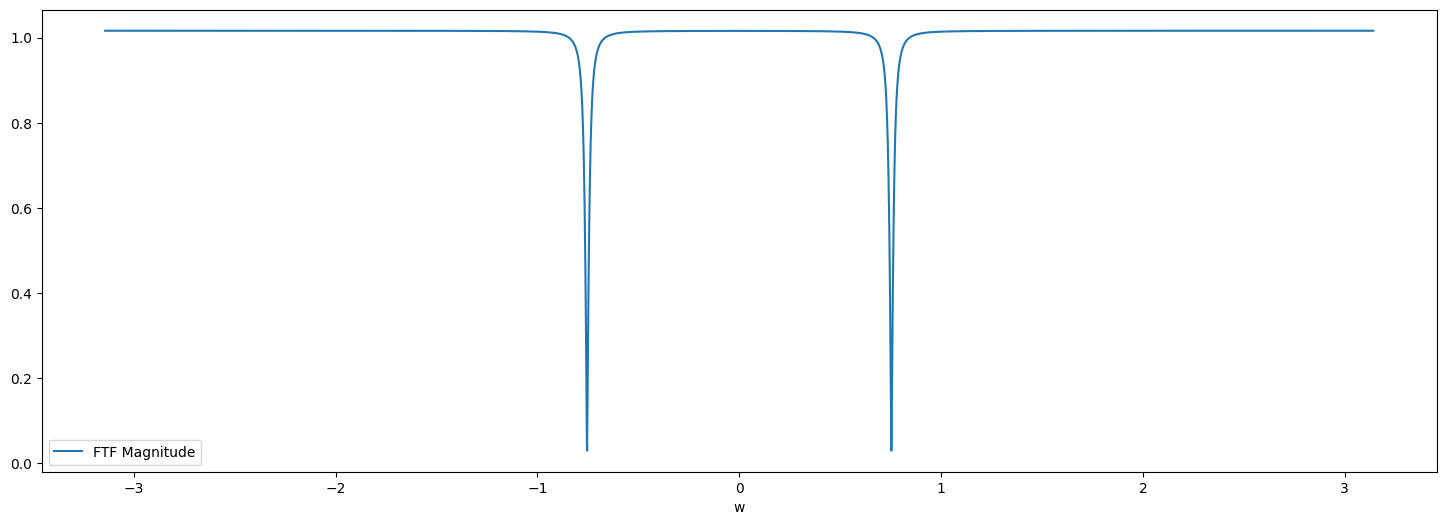

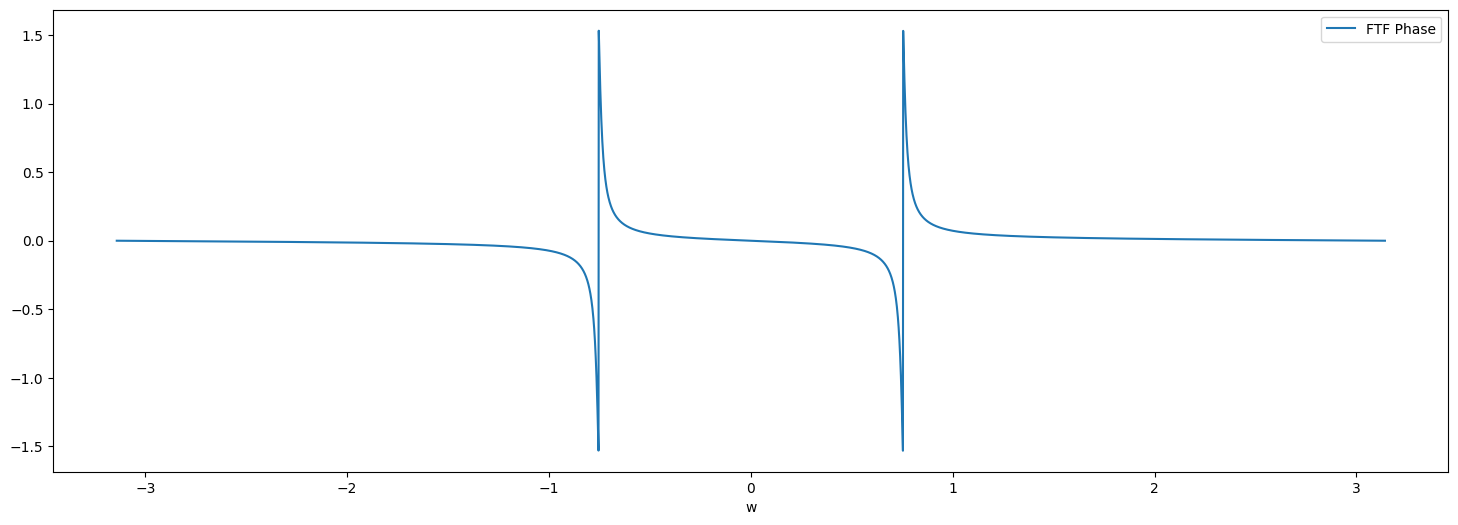

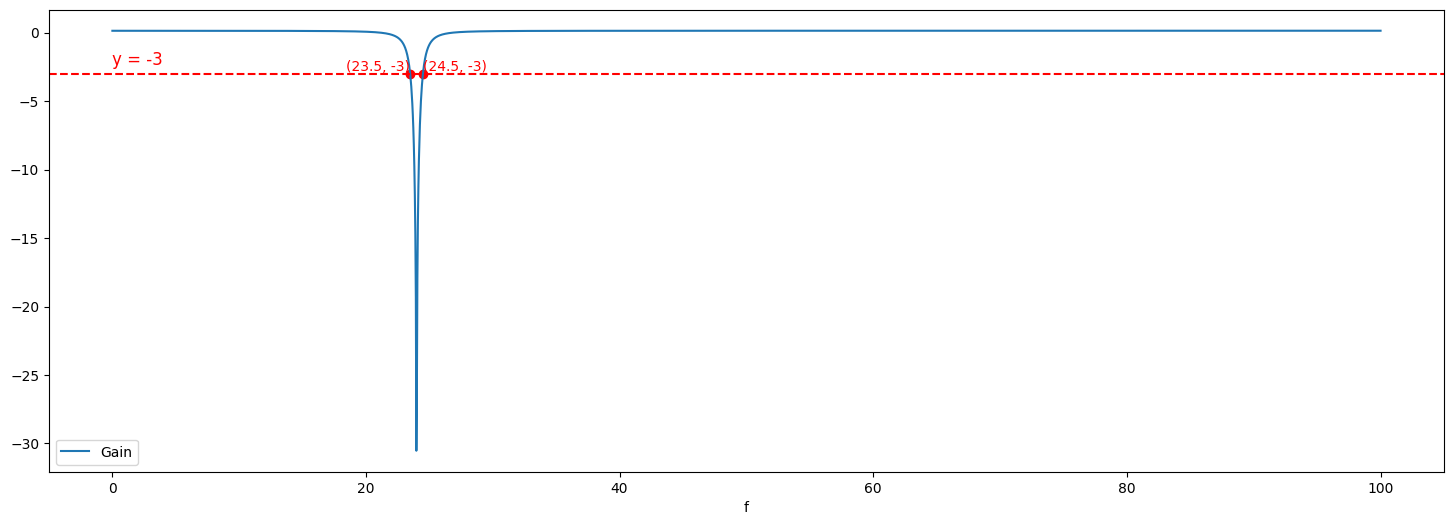

In [94]:
min_r = min_r_making_band_with_1
bz = [1, -2 * np.cos(notch_dig_w), 1]
az = [1, -2 * min_r * np.cos(notch_dig_w), min_r ** 2]
plot_complex_numbers(*pzmap(bz, az))
ws, hs = frequency_response(bz, az)
hs_plots = get_mod_pha_real_imag(hs)
ana_fs = dig_w_to_ana_f(ws)

prop_desc = ['Magnitude', 'Phase', 'Real', 'Imaginary']
for prop in range(2):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(ws, hs_plots[prop], '-', label=f'FTF {prop_desc[prop]}')
    plt.xlabel('w')
    plt.legend()
    fig.show()

DISPLAY_N = len(ws) // 2
fig = plt.figure(figsize=(18, 6))
plt.plot(ana_fs[DISPLAY_N:], db(hs_plots[0][DISPLAY_N:]), '-', label=f'Gain')
plt.axhline(y=-3, color='r', linestyle='--')  # Draw horizontal line at y = 0.707
plt.text(0, -2, 'y = -3', color='r', fontsize=12, va='center')  # Add text annotation
plt.scatter([23.5, 24.5], [-3, -3], color='red')
# 添加文本标注
plt.text(23.5, -3, '(23.5, -3)', color='red', fontsize=10, va='bottom', ha='right')
plt.text(24.5, -3, '(24.5, -3)', color='red', fontsize=10, va='bottom', ha='left')
plt.xlabel('f')
plt.legend()
fig.show()


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/2298408698.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


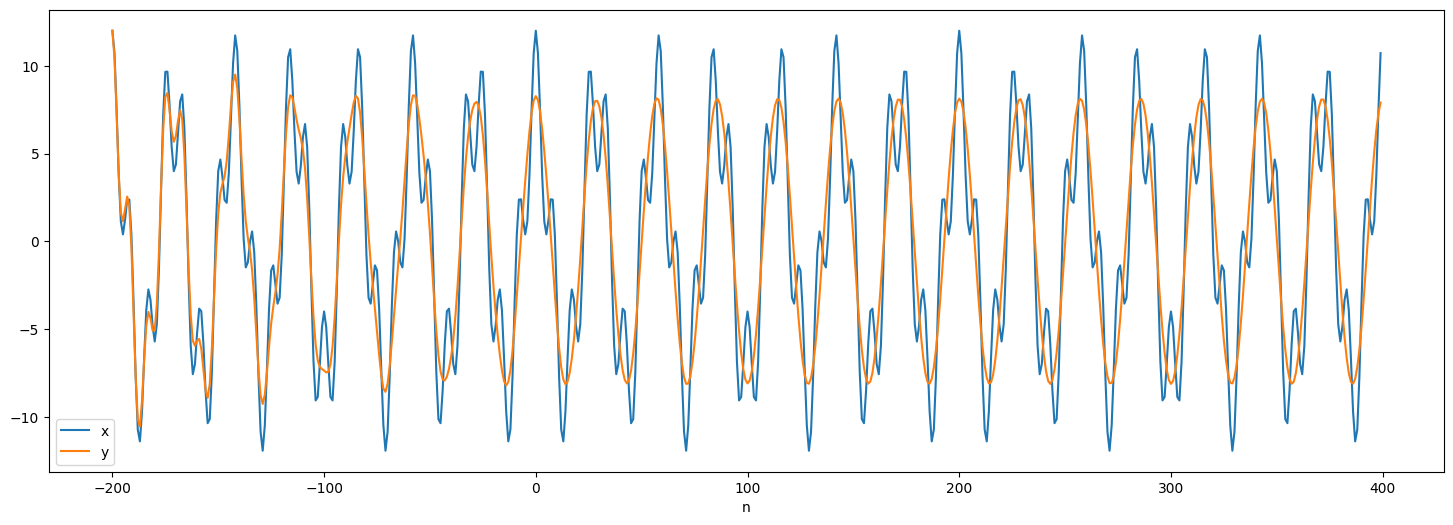

In [47]:
_, ys = filter(bz, az, xs, 600)
fig = plt.figure(figsize=(18, 6))
plt.plot(ns, xs, '-', label=f'x')
plt.plot(ns, ys, '-', label=f'y')
plt.xlabel('n')
plt.legend()
fig.show()


0.015707963267948967
0.015538488877220116 0.015707963267948967
9.653448362015736
[ 0.10358993 -0.12837347  0.07484372] [ 1.         -1.43528311  0.96916447]


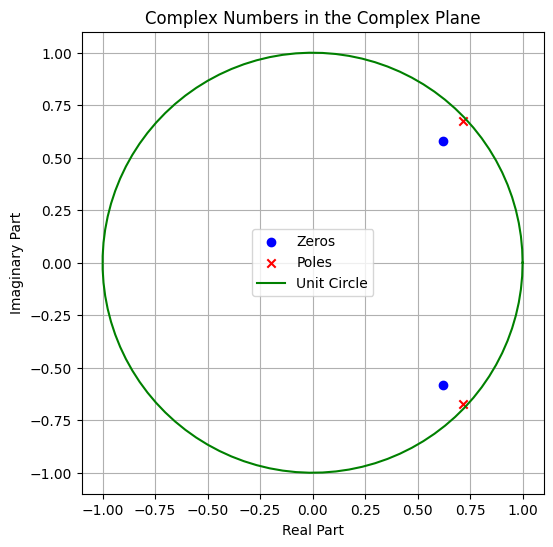

In [157]:
comb_f = 24
notch_dig_w = ana_f_to_dig_w(comb_f)

def coef_of_r(r):
    return np.array([1, -2 * r * np.cos(notch_dig_w), r ** 2])
del_w = ana_f_to_dig_w(0.5)
print(del_w)
good_y = 0.15 # zero 必须接近单位圆，使得远离此频率时，不受该点影响
zero_r = 1 - good_y
x_with_band_1 = (del_w * good_y) / (2 * del_w ** 2 + good_y ** 2) ** 0.5
pole_r = 1 - x_with_band_1
print(x_with_band_1, del_w)
max_gain = (1 - zero_r) / (1 - pole_r)
print(max_gain)
bz = coef_of_r(zero_r) / max_gain
az = coef_of_r(pole_r)
print(bz, az)
ws, hs = frequency_response(bz, az, 50000)
plot_complex_numbers(*pzmap(bz, az))

# for r in rs:
#     # get the band width of -3dB
#     ...
#     bz = coef_of_r(r)
#     az = coef_of_r(omg_r)
#     max_gain = (1 - r) / (1 - omg_r)
#     ws, hs = frequency_response(bz, az, 30000)
#     hs = np.abs(hs) / max_gain
#     ws, hs = ws[len(ws) // 2:], hs[len(hs) // 2:]

#     # first one lower than -3dB
#     if r == rs[0]:
#         __draw(ws, hs)
#     those_w_higher_than_minus_3_db = [w for w, h in zip(ws, hs) if db(h) > -3]
#     if len(those_w_higher_than_minus_3_db) < 2:
#         band_fs.append(0)
#         continue
#     l_f = dig_w_to_ana_f(those_w_higher_than_minus_3_db[0])
#     r_f = dig_w_to_ana_f(those_w_higher_than_minus_3_db[-1])
#     # print(l_f, r_f)
#     band_f = r_f - l_f
#     band_fs.append(band_f)

# __draw(rs, band_fs)
# min_zero_r_making_band_with_1 = [r for r, band_f in zip(rs, band_fs) if band_f >= 1][0]
# print(min_zero_r_making_band_with_1)

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/2412514120.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/2412514120.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


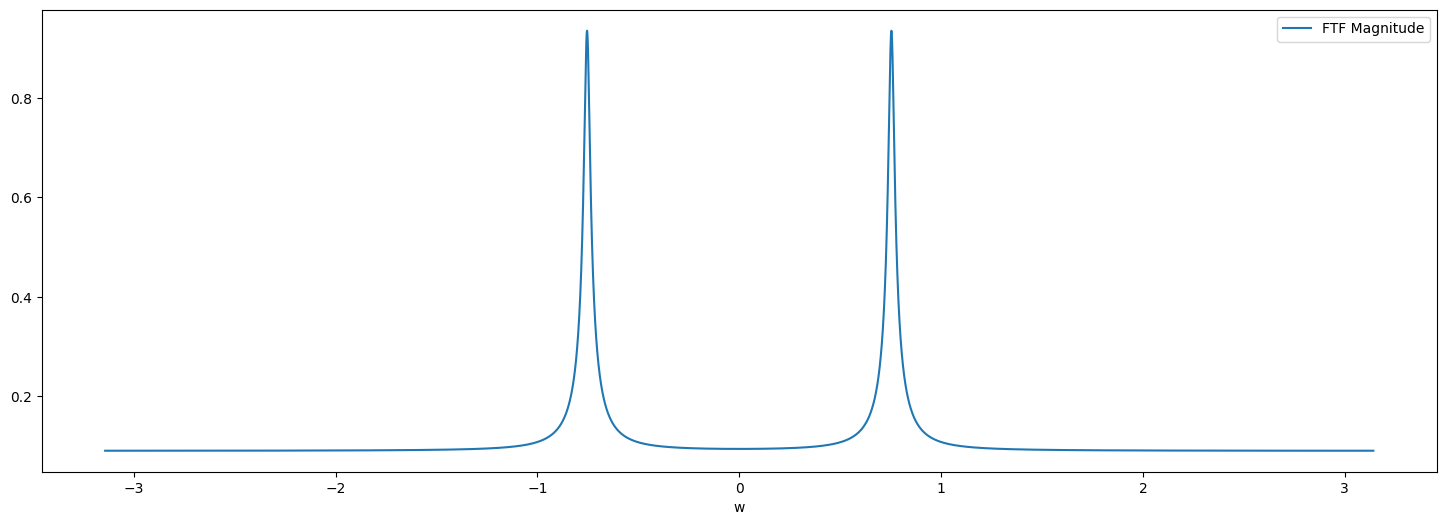

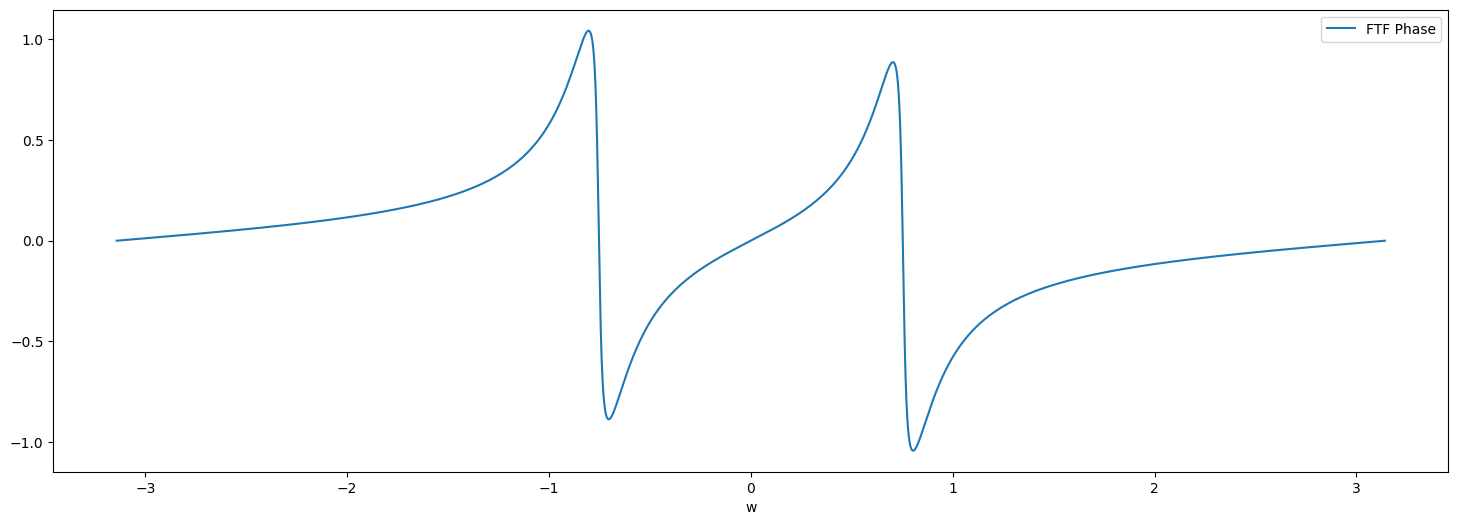

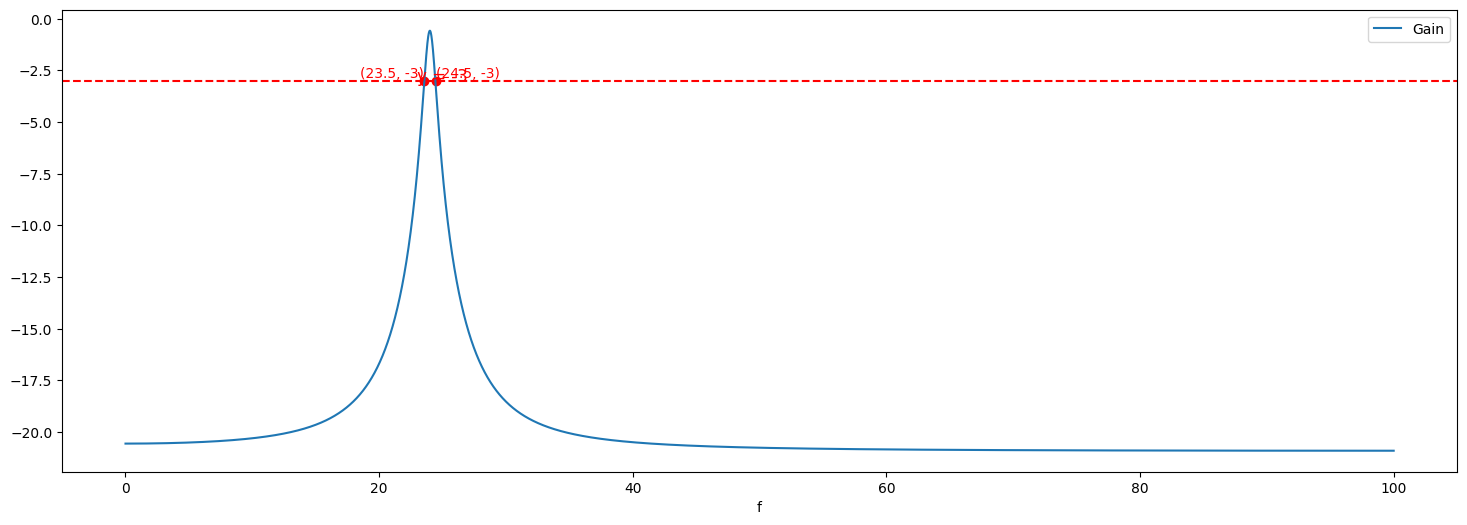

In [158]:
hs_plots = get_mod_pha_real_imag(hs)
ana_fs = dig_w_to_ana_f(ws)

prop_desc = ['Magnitude', 'Phase', 'Real', 'Imaginary']
for prop in range(2):
    fig = plt.figure(figsize=(18, 6))
    plt.plot(ws, hs_plots[prop], '-', label=f'FTF {prop_desc[prop]}')
    plt.xlabel('w')
    plt.legend()
    fig.show()

ana_fs_idx_around_24 = np.where((ana_fs > 0))

fig = plt.figure(figsize=(18, 6))
plt.plot(ana_fs[ana_fs_idx_around_24], db(hs_plots[0][ana_fs_idx_around_24]), '-', label=f'Gain')
plt.axhline(y=-3, color='r', linestyle='--')  # Draw horizontal line at y = 0.707
plt.text(23, -2.8, 'y = -3', color='r', fontsize=12, va='center')  # Add text annotation
plt.scatter([23.5, 24.5], [-3, -3], color='red')
# 添加文本标注
plt.text(23.5, -3, '(23.5, -3)', color='red', fontsize=10, va='bottom', ha='right')
plt.text(24.5, -3, '(24.5, -3)', color='red', fontsize=10, va='bottom', ha='left')
plt.xlabel('f')
plt.legend()
fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_97378/2298408698.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


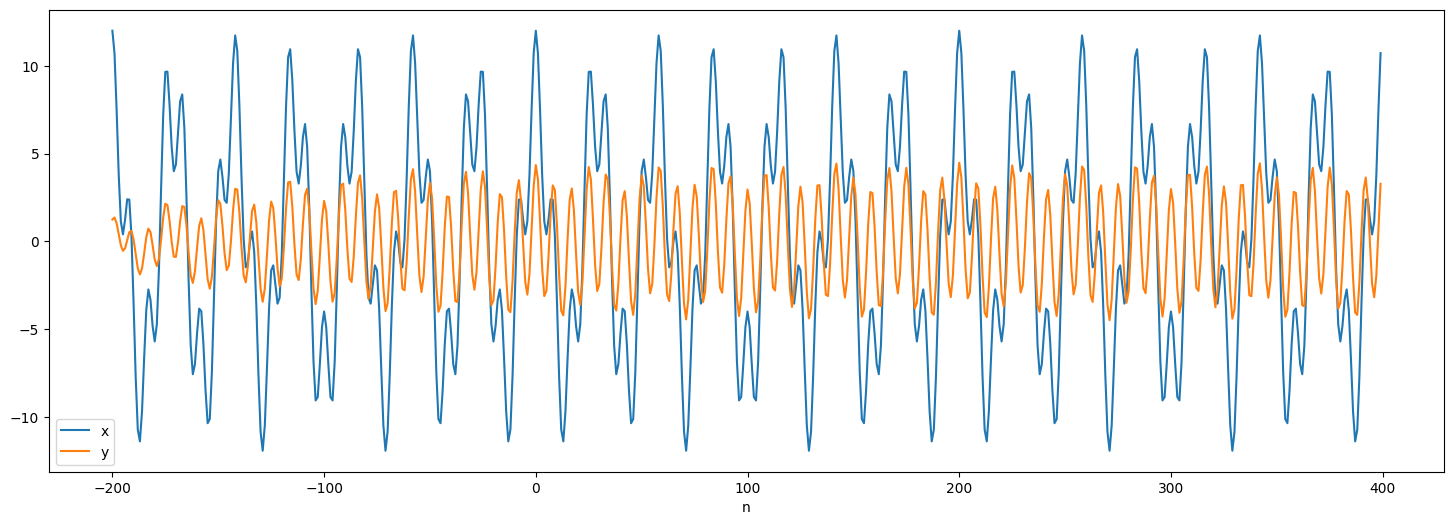

In [159]:
_, ys = filter(bz, az, xs, 600)
fig = plt.figure(figsize=(18, 6))
plt.plot(ns, xs, '-', label=f'x')
plt.plot(ns, ys, '-', label=f'y')
plt.xlabel('n')
plt.legend()
fig.show()